### Topic 13 14 Assigment
### Amelia Nagita

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, metrics

In [144]:
df = pd.read_csv('train.csv')

In [145]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Mengecek value yang hilang


In [147]:
for i in df:
  print("{} = {}".format(i,df[i].isna().sum()))


Id = 0
MSSubClass = 0
MSZoning = 0
LotFrontage = 259
LotArea = 0
Street = 0
Alley = 1369
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 8
MasVnrArea = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinSF1 = 0
BsmtFinType2 = 38
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 1
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageCars = 0
GarageArea = 0
GarageQual = 81
GarageCond = 81
PavedDrive = 0
WoodDeckSF =

### Melakukan drop pada data yang sebagian besar hilang


In [148]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 'columns', inplace = True)

### One Hot Encoding


In [149]:
df2 = pd.get_dummies(df2)
df2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


### Melakukan fillna terhadap data yang masih bisa diperbaiki


In [150]:
df2 = df.copy()
df2['LotFrontage'] = df2['LotFrontage'].fillna(df2['LotFrontage'].median())
df2['MasVnrArea'] = df2['MasVnrArea'].fillna(df2['MasVnrArea'].median())
df2['GarageYrBlt'] = df2['GarageYrBlt'].fillna(df2['GarageYrBlt'].median())

In [151]:
df2['MasVnrType'] = df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0])
df2['BsmtQual'] = df2['BsmtQual'].fillna(df2['BsmtQual'].mode()[0])
df2['GarageType'] = df2['GarageType'].fillna(df2['GarageType'].mode()[0])
df2['GarageFinish'] = df2['GarageFinish'].fillna(df2['GarageFinish'].mode()[0])
df2['GarageQual'] = df2['GarageQual'].fillna(df2['GarageQual'].mode()[0])
df2['GarageCond'] = df2['GarageCond'].fillna(df2['GarageCond'].mode()[0])
df2['BsmtFinType1'] = df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].mode()[0])
df2['BsmtExposure'] = df2['BsmtExposure'].fillna(df2['BsmtExposure'].mode()[0])
df2['BsmtCond'] = df2['BsmtCond'].fillna(df2['BsmtCond'].mode()[0])
df2['BsmtFinType2'] = df2['BsmtFinType2'].fillna(df2['BsmtFinType2'].mode()[0])
df2['Electrical'] = df2['Electrical'].fillna(df2['Electrical'].mode()[0])

### Mengecheck ulang


In [152]:
for i in df2:
  print("{} = {}".format(i,df2[i].isna().sum()))

Id = 0
MSSubClass = 0
MSZoning = 0
LotFrontage = 0
LotArea = 0
Street = 0
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 0
MasVnrArea = 0
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 0
BsmtCond = 0
BsmtExposure = 0
BsmtFinType1 = 0
BsmtFinSF1 = 0
BsmtFinType2 = 0
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 0
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
GarageType = 0
GarageYrBlt = 0
GarageFinish = 0
GarageCars = 0
GarageArea = 0
GarageQual = 0
GarageCond = 0
PavedDrive = 0
WoodDeckSF = 0
OpenPorchSF = 0
EnclosedPorch = 0
3SsnPo

<AxesSubplot:>

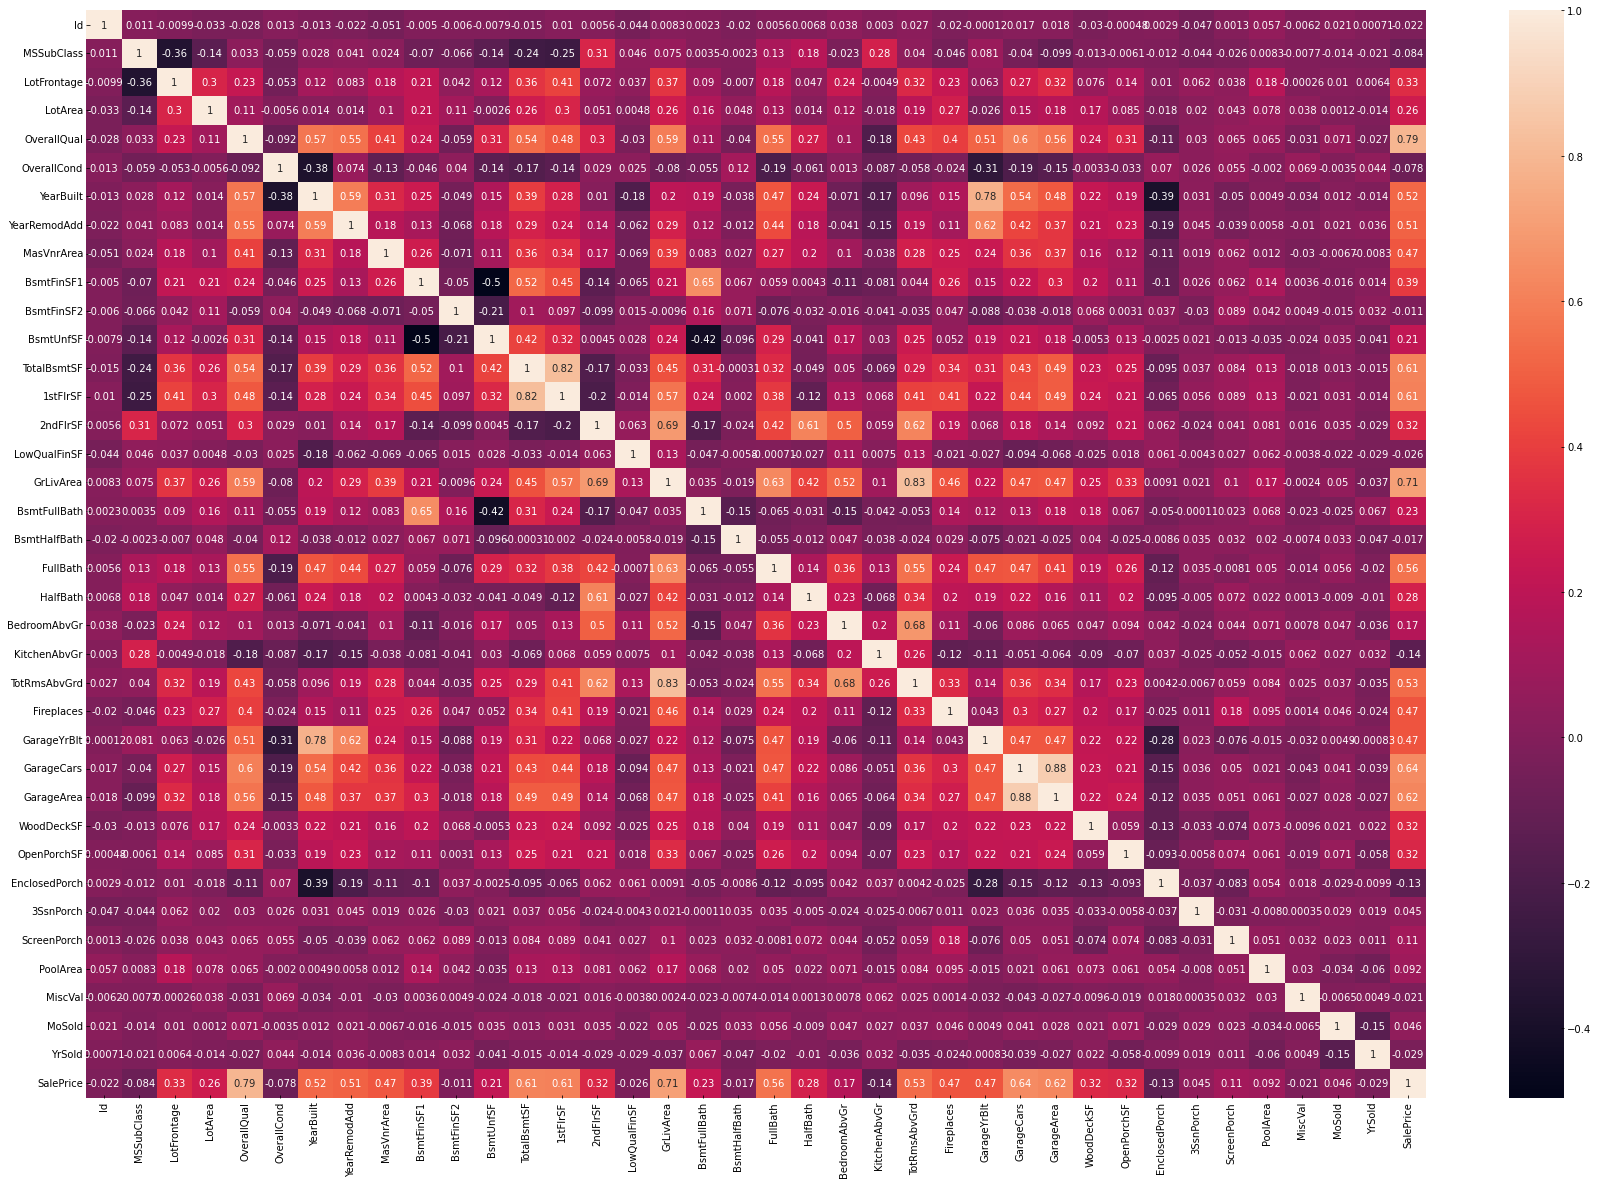

In [157]:
plt.figure(figsize = (30,20))
sns.heatmap(df2.corr(),data=df2,annot=True)

### Visualisasi Korelasi variabel yang berpengaruh pada kolom SalePrice


<AxesSubplot:>

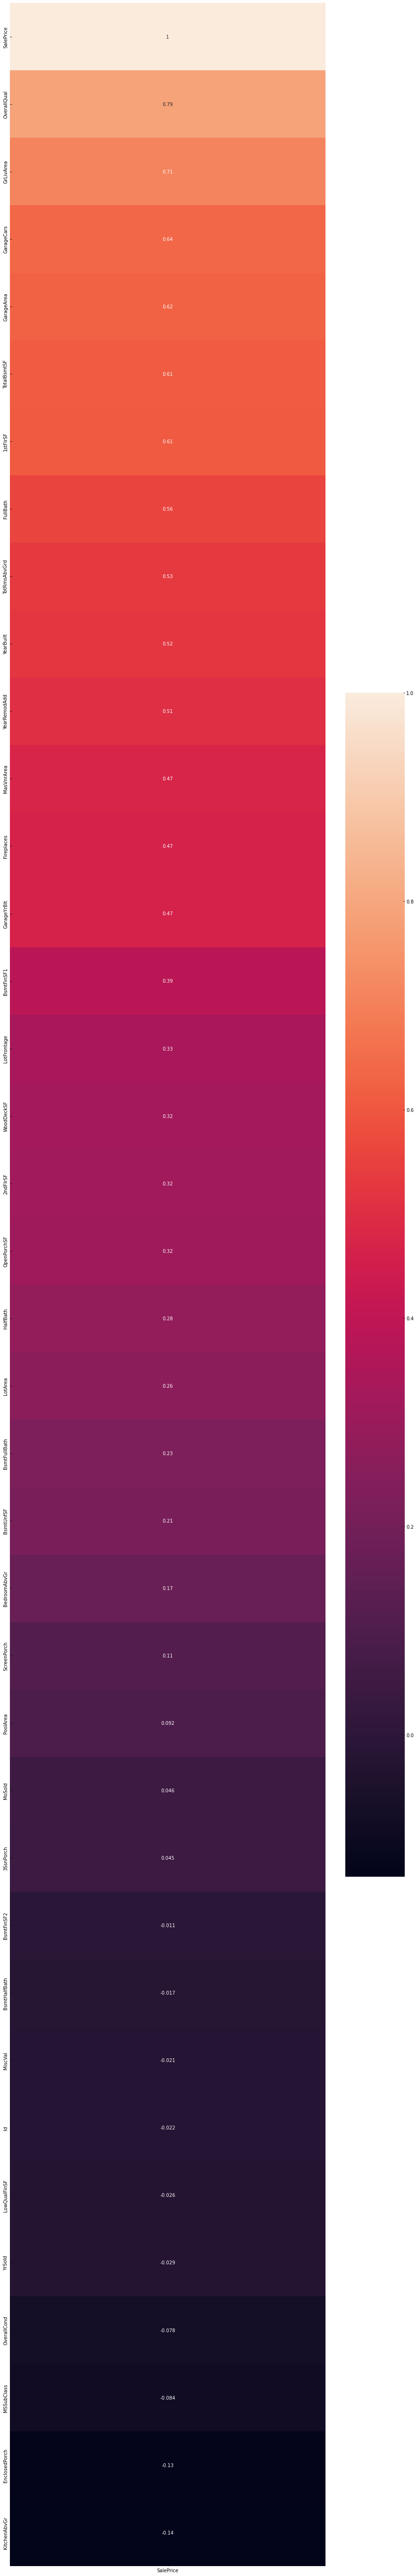

In [158]:
corr_numerical = df2.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
fig, ax = plt.subplots(figsize = (15,100))
sns.heatmap(corr_numerical, ax = ax, annot=True)

In [159]:
df3 = df2[['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']]

In [160]:
X = df3.drop('SalePrice',axis=1)
y = df3['SalePrice']

### Split data perbandingan 60:40


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

### membuat linear regression object


In [162]:
reg = linear_model.LinearRegression()
 
# melakukan model training
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [26405.36646733    52.47724945 21195.68361667]
Intercept:  -97198.680538641


In [166]:
y_pred = reg.predict(X_test)

### MAE


In [167]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

28189.81473259219

### RMSE


In [168]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

40807.03620585919

### R-Square


In [169]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7480604026203846

Variance score: 0.7480604026203846


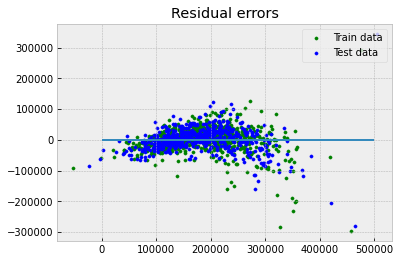

In [170]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot untuk menampilkan residual error
 
## setting plot style
plt.style.use('bmh')
 
## plotting residual errors untuk training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors untuk test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting garis lurus untuk zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 500000, linewidth = 2)
 
## keterangan plotting
plt.legend(loc = 'upper right')
 
## Judul plot 
plt.title("Residual errors")
 
plt.show()

Berdasarkan hasil training model diatas dan divisualisasikan seperti gambar diatas dapat diambil kesimpulan model mampu memprediksi dengan cukup baik

# **CLASSIFICATION**

In [171]:
df_new = pd.read_csv('heart.csv')
df_new

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [172]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Check Imbalance Data


In [173]:
df_new['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Melakukan oversampling data


In [184]:
from sklearn.utils import resample

heart_majority = df_new[(df_new['HeartDisease']== 1 )] #Mayoritas
heart_minority = df_new[(df_new['HeartDisease']== 0 )] #MInoritas

heart_majority_downsampled = resample(heart_majority, 
                                 replace=True,  
                                 n_samples= 410, 
                                 random_state=42) 

heart_upsampled = pd.concat([heart_majority_downsampled, heart_minority])

### Melakukan one hot encoding


In [218]:
heart = pd.get_dummies(df_new)

In [219]:
X = heart.drop("HeartDisease",axis=1)
y = heart["HeartDisease"]

In [220]:
# split data menjadi 60 : 40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [221]:
#Menggunakan logistik regression
from sklearn.linear_model import LogisticRegression

#Logistic Regression menggunakan Limited-memory Broyden–Fletcher–Goldfarb–Shanno Solver
lr = LogisticRegression(solver='lbfgs', max_iter=1000) #max_iter = maksimal iterasi
lr = lr.fit(X_train, y_train)

In [222]:
#Menggunakan random forest
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
#Menggunakan hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


In [ ]:
grid_search.best_score_

In [214]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [215]:
# Logistic Regression
y_lr = lr.predict(X_test)

# Random Forest Awal
y_rf_before = classifier_rf.predict(X_test)

# Random Forest Setelah Hyperparameter Tuning
y_rf_after = rf_best.predict(X_test)

In [216]:
#Confusion Matrix Algoritma

from sklearn.metrics import confusion_matrix
print("Logistic Regression : \n", confusion_matrix(y_test, y_lr))
print("Random Forest Awal : \n", confusion_matrix(y_test, y_rf_before))
print("Random Forest Setelah Hyperparameter Tuning : \n", confusion_matrix(y_test, y_rf_after))

Logistic Regression : 
 [[133  20]
 [ 29 186]]
Random Forest Awal : 
 [[128  25]
 [ 18 197]]
Random Forest Setelah Hyperparameter Tuning : 
 [[127  26]
 [ 20 195]]


In [217]:
#Evaluasi  AUC

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1)
print("Logistic Regression : ", auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_before, pos_label=1)
print("Random Forest Awal : ", auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_after, pos_label=1)
print("Random Forest Setelah Hyperparameter Tuning : ", (auc(fpr, tpr)))

Logistic Regression :  0.8671986624107006
Random Forest Awal :  0.8764401884784923
Random Forest Setelah Hyperparameter Tuning :  0.8685210518315852


In [196]:
#Evaluasi Menggunakan Classification Report

from sklearn.metrics import classification_report
print("Logistic Regression : \n\n", classification_report(y_test, y_lr))
print("\n\nRandom Forest Awal : \n\n", classification_report(y_test, y_rf_before))
print("\n\nRandom Forest Setelah Hyperparameter Tuning : \n\n", classification_report(y_test, y_rf_after))

Logistic Regression : 

               precision    recall  f1-score   support

           0       0.82      0.87      0.84       153
           1       0.90      0.87      0.88       215

    accuracy                           0.87       368
   macro avg       0.86      0.87      0.86       368
weighted avg       0.87      0.87      0.87       368



Random Forest Awal : 

               precision    recall  f1-score   support

           0       0.88      0.84      0.86       153
           1       0.89      0.92      0.90       215

    accuracy                           0.88       368
   macro avg       0.88      0.88      0.88       368
weighted avg       0.88      0.88      0.88       368



Random Forest Setelah Hyperparameter Tuning : 

               precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.88      0.91      0.89       215

    accuracy                           0.88       368
   macro avg       0.87   

Conclusion :

*   Dari Beberapa Algoritma yang diujicobakan Randomforest adalah algoritma yang terbaik pada kasus ini. Dengan melalui 3 metode evaluasi Confusion Matrix, AUC dan Classification Report pada setiap algoritma, Randomforest melebihi akurasi dari 2 algoritma lainnya.

